In [19]:
import rpy2.ipython


%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


| Species            | Area | Location    | ENA Sample ID | SRA Accession | Source (Manucsript) |
| :----------------- | :--- | :---------- |-------------- | :------------ | :------------------ |
| *S. mansoni*       | EA   | Kenya       | ERS074980     | ERR119614     | Crellen et. al 2016 |
| *S. mansoni*       | EA   | Uganda-LA   | ERS074982     | ERR119615     | Crellen et. al 2016 |
| *S. mansoni*       | NW   | Puerto Rico | ERS039722     | ERR046038     | .                   |
| *S. mansoni*       | WA   | Senegal     | ERS074979     | ERR103049     | Crellen et. al 2016 |
| *S. mansoni*       | WA   | Cameroon    | ERS074981     | ERR103050     | Crellen et. al 2016 |
| *S. mansoni*       | EA   | Uganda-LV   | ERS141391     | ERR997461     | Crellen et. al 2016 |
| *S. mansoni*       | ?    | ?           | ?             | ERR539845     | .                   |
| *S. mansoni*       | NW   | Guadeloupe  | ERS427393     | ERR539846     | Crellen et. al 2016 |
| *S. mansoni*       | NW   | Guadeloupe  | ERS427392     | ERR539847     | Crellen et. al 2016 |
| *S. margrebowiei*  | ?    | ?           | ?             | ERX095893     | .                   |
| *S. margrebowiei*  | ?    | ?           | ?             | ERX284221     | .                   |
| *S. mansoni*       | NW   | Guadeloupe  | ERS427394     | ERR539848     | Crellen et. al 2016 |
| *S. rodhaini*      | RO   | Burundi     | ERS076741     | ERR310938     | Crellen et. al 2016 |
| *S. turkestanicum* | ?    | ?           | ERS139290     | ERX284225     | .                   |

Crellen *et al*. (2016) __Whole genome resequencing of the human parasite *Schistosoma mansoni* reveals population history and effects of selection__. [Scientific Reports 6:20954.](https://www.nature.com/articles/srep20954)

### Maps

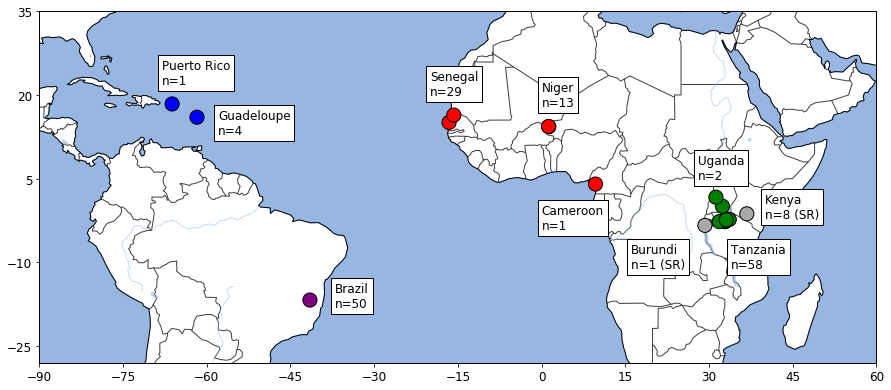

In [14]:
#make a clean dir
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import numpy as np
import shutil


if os.path.isdir("results/maps"):
    shutil.rmtree("results/maps")
os.mkdir("results/maps")

pop_colors={}
pop_colors["eafrica"]   = "green"
pop_colors["wafrica"]   = "red"
pop_colors["brazil"]    = "purple"
pop_colors["caribbean"] = "blue"
pop_colors["rodhaini"]  = "darkgrey"

#get coordinates
# data/sampling_lat_lon.csv

# Country Location,Latitude,Longitude
# Senegal,Nder,15.083333,-16.566667
# Senegal,TemeyeS3,16.389444,-15.728889
# Niger,Diambala,14.31376,1.299648
# Niger,Namarigoungou,14.3554,1.2627
# Tanzania,Kigongo,-2.70955,32.89879
# Tanzania,Kabita,-2.31845,33.64372
# Tanzania,Nyamazugo,-2.55731,32.54214
# Tanzania,Katunguru,-2.50537937,32.67316932
# Tanzania,Luchelele,-2.61916,32.8733
# Tanzania,Nyandago,-2.69974,31.85495
# Tanzania,Sekagi,-2.39005,33.09819
# Brazil,Pontos dos Volantes,-16.752778,-41.503889
# Kenya, Nairobi, -1.3011869,36.7906464 
# Uganda,Lake Victoria, 0.0583665,32.4151119,13
# Uganda,Lake Alberta, 1.6738572,31.2493658
# Burundia,,-3.3751268,29.2853413
# Guadeloupe,,16.0102561,-61.7489572
# Puerto Rico,,18.389512,-66.2005625
# Cameroon,,4.036072,9.6717631


sample_sites = np.array([ [15.083333,   -16.566667],
                          [16.389444,   -15.728889],
                          [14.31376,    1.299648],
                          [14.3554,     1.2627],
                          [-2.70955,    32.89879],
                          [-2.31845,    33.64372],
                          [-2.55731,    32.54214],
                          [-2.50537937, 32.67316932],
                          [-2.61916,    32.8733],
                          [-2.69974,    31.85495],
                          [-2.39005,    33.09819],
                          [-16.752778,  -41.503889],
                          [-1.3011869,  36.7906464], 
                          [0.0583665,   32.4151119],
                          [1.6738572,   31.2493658],
                          [-3.3751268,  29.2853413],
                          [16.0102561,  -61.7489572],
                          [18.389512,   -66.2005625],
                          [4.036072,    9.6717631]    ])

lons, lats = sample_sites.T

   
site_colors = [pop_colors["wafrica"],   pop_colors["wafrica"],   pop_colors["wafrica"],  pop_colors["wafrica"], 
               pop_colors["eafrica"],   pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["eafrica"], 
               pop_colors["eafrica"],   pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["brazil"], 
               pop_colors["rodhaini"],  pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["rodhaini"], 
               pop_colors["caribbean"], pop_colors["caribbean"], pop_colors["wafrica"] ] 

#set fig size
plt.figure(figsize=(15, 15))

#gen axes
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

#draw land features
ax.add_feature(cartopy.feature.LAND, facecolor = "white")
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, alpha = 0.75)
ax.add_feature(cartopy.feature.LAKES, alpha = 0.5)
ax.add_feature(cartopy.feature.RIVERS, alpha = 0.5)

#set lat and long tick marks
lat_ticks = np.arange(-105, 80, 15)
lon_ticks = np.arange(-70,  70, 15)

ax.set_xticks(lat_ticks, crs = ccrs.PlateCarree())
ax.set_yticks(lon_ticks, crs = ccrs.PlateCarree())
plt.tick_params(labelsize = 12)

plt.text(-68, 22,  "Puerto Rico\nn=1",  bbox=dict(facecolor='white'), fontsize=12)
plt.text(-58, 13,  "Guadeloupe\nn=4",   bbox=dict(facecolor='white'), fontsize=12)
plt.text(-37, -18, "Brazil\nn=50",      bbox=dict(facecolor='white'), fontsize=12)
plt.text(-20, 20,  "Senegal\nn=29",     bbox=dict(facecolor='white'), fontsize=12)
plt.text(0,   18,  "Niger\nn=13",       bbox=dict(facecolor='white'), fontsize=12)
plt.text(0,   -4,  "Cameroon\nn=1",     bbox=dict(facecolor='white'), fontsize=12)
plt.text(34,  -11, "Tanzania\nn=58",    bbox=dict(facecolor='white'), fontsize=12)
plt.text(16,  -11, "Burundi\nn=1 (SR)", bbox=dict(facecolor='white'), fontsize=12)
plt.text(28,  5,   "Uganda\nn=2",       bbox=dict(facecolor='white'), fontsize=12)
plt.text(40,  -2,  "Kenya\nn=8 (SR)",   bbox=dict(facecolor='white'), fontsize=12)

#set limits of map
ax.set_extent([-90, 60, -28, 35], crs = ccrs.PlateCarree())

#plot sampling logations
plt.scatter(lats, lons,
            facecolors = site_colors, 
            edgecolors = 'black', 
            linewidth  = 1, 
            marker     = 'o', 
            s          = 200, 
            alpha      = 1,
            transform  = ccrs.PlateCarree(), 
            zorder     = 10 )

plt.savefig("results/maps/world_map.svg", format="svg")
plt.savefig("results/maps/world_map.png", format="png")

plt.show()


### Get data

In [ ]:
#make clean dir
if not os.path.isdir("data/sra"):
    os.mkdir("data/sra")

#download sra data for each sample
sra_accessions = [ "ERR119614", "ERR119615", "ERR046038",
                   "ERR103049", "ERR103050", "ERR997461", 
                   "ERR539845", "ERR539846", "ERR539847"              
                   "ERX095893", "ERX284221", "ERR539848",
                   "ERR310938", "ERX284225"   ]

for accession in sra_accessions:
    !fastq-dump --split-files --gzip --outdir data/seq_data/wg_sra/ {accession}

In [ ]:
#get exome data (soon to be in the sra)

In [ ]:
#get smansoni v7 genome and annotations

### Genotyping

In [ ]:
%%bash

#run snakemake
snakemake \
    --printshellcmds \
    --use-conda \
    --cluster 'qsub -V -cwd -S /bin/bash -pe smp {threads} -o {log}.log -j y' \
    --jobs 1000 \
    --latency-wait 200 \
    --keep-going

### Filtering

In [25]:
%%bash

vcftools \
    --vcf results/variant_filtration/hard_filtered.vcf \
    --minDP 12 \
    --minGQ 25 \
    --min-alleles 2 \
    --max-alleles 2 \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/gq25_dp12.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/hard_filtered.vcf
	--recode-INFO-all
	--max-alleles 2
	--min-alleles 2
	--minDP 12
	--minGQ 25
	--recode
	--stdout

After filtering, kept 172 out of 172 Individuals
Outputting VCF file...
After filtering, kept 732936 out of a possible 765487 Sites
Run Time = 1121.00 seconds


In [28]:
%%bash

#find sites with gt50% missing data
vcftools \
    --vcf results/variant_filtration/gq25_dp12.vcf \
    --missing-site \
    --stdout \
    >results/variant_filtration/gt_rate_per_site.tbl

awk '{if ($6<=0.5) print $1"\t"$2}' \
    results/variant_filtration/gt_rate_per_site.tbl \
    >results/variant_filtration/gt_rate_ge_50p.list

vcftools \
    --vcf results/variant_filtration/gq25_dp12.vcf \
    --positions results/variant_filtration/gt_rate_ge_50p.list \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/gt_rate_ge_50p.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/gq25_dp12.vcf
	--missing-site
	--stdout

After filtering, kept 172 out of 172 Individuals
Outputting Site Missingness
After filtering, kept 732936 out of a possible 732936 Sites
Run Time = 52.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/gq25_dp12.vcf
	--recode-INFO-all
	--positions results/variant_filtration/gt_rate_ge_50p.list
	--recode
	--stdout

After filtering, kept 172 out of 172 Individuals
Outputting VCF file...
After filtering, kept 689912 out of a possible 732936 Sites
Run Time = 866.00 seconds


In [29]:
%%bash

#find idivs with lt 50p data
vcftools \
    --vcf results/variant_filtration/gt_rate_ge_50p.vcf \
    --missing-indv \
    --stdout \
    >results/variant_filtration/indiv_gt_rate.tbl

cat results/variant_filtration/indiv_gt_rate.tbl \
    | awk '$5>0.50 {print $1}' \
    | sed 1d \
    >results/variant_filtration/indiv_gt_rate_lt_50p.list

vcftools \
    --vcf results/variant_filtration/gt_rate_ge_50p.vcf \
    --remove results/variant_filtration/indiv_gt_rate_lt_50p.list \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/50p_site_50p_indiv_filtered.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/gt_rate_ge_50p.vcf
	--missing-indv
	--stdout

After filtering, kept 172 out of 172 Individuals
Outputting Individual Missingness
After filtering, kept 689912 out of a possible 689912 Sites
Run Time = 49.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/gt_rate_ge_50p.vcf
	--remove results/variant_filtration/indiv_gt_rate_lt_50p.list
	--recode-INFO-all
	--recode
	--stdout

Excluding individuals in 'exclude' list
After filtering, kept 156 out of 172 Individuals
Outputting VCF file...
After filtering, kept 689912 out of a possible 689912 Sites
Run Time = 812.00 seconds


In [31]:
%%bash

bcftools annotate \
    --set-id +'%CHROM\:%POS' \
    results/variant_filtration/50p_site_50p_indiv_filtered.vcf \
    >results/variant_filtration/50p_site_50p_indiv_filtered_annotated.vcf

In [32]:
%%bash

grep "#" results/variant_filtration/50p_site_50p_indiv_filtered_annotated.vcf >results/variant_filtration/header.vcf

In [34]:
%%bash

#manually re-arrange samples into desired order and save as results/variant_filtration/re-organized_header.vcf
#gzip results/variant_filtration/50p_site_50p_indiv_filtered_annotated.vcf
#gzip results/variant_filtration/re-organized_header.vcf

vcf-shuffle-cols -t results/variant_filtration/re-organized_header.vcf.gz \
    results/variant_filtration/50p_site_50p_indiv_filtered_annotated.vcf.gz \
    >results/variant_filtration/smv7_ex_snps.vcf

In [35]:
%%bash

vcftools \
    --vcf results/variant_filtration/smv7_ex_snps.vcf \
    --maf 0.025 \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/smv7_ex_maf025.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/shv2_wg_snps.vcf
	--recode-INFO-all
	--maf 0.025
	--recode
	--stdout

After filtering, kept 156 out of 156 Individuals
Outputting VCF file...
After filtering, kept 149247 out of a possible 689912 Sites
Run Time = 215.00 seconds


In [36]:
%%bash

vcftools \
    --vcf results/variant_filtration/smv7_ex_maf025.vcf \
    --chr SM_V7_1 \
    --chr SM_V7_2 \
    --chr SM_V7_3 \
    --chr SM_V7_4 \
    --chr SM_V7_5 \
    --chr SM_V7_6 \
    --chr SM_V7_7 \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/smv7_ex_maf025_autsomes.vcf
    


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/shv2_wg_maf025.vcf
	--chr SM_V7_1
	--chr SM_V7_2
	--chr SM_V7_3
	--chr SM_V7_4
	--chr SM_V7_5
	--chr SM_V7_6
	--chr SM_V7_7
	--recode-INFO-all
	--recode
	--stdout

After filtering, kept 156 out of 156 Individuals
Outputting VCF file...
After filtering, kept 116078 out of a possible 149247 Sites
Run Time = 137.00 seconds


In [43]:
%%bash

#find SNPs in LD
plink \
    --vcf results/variant_filtration/smv7_ex_maf025_autsomes.vcf \
    --double-id \
    --allow-extra-chr \
    --indep-pairwise 250kb 1 0.20 \
    --out results/variant_filtration/smv7_ex_maf025_autsomes_ld

PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/variant_filtration/shv2_wg_maf025_autsomes_ld.log.
Options in effect:
  --allow-extra-chr
  --double-id
  --indep-pairwise 250kb 1 0.20
  --out results/variant_filtration/shv2_wg_maf025_autsomes_ld
  --vcf results/variant_filtration/shv2_wg_maf025_autsomes.vcf

24158 MB RAM detected; reserving 12079 MB for main workspace.
--vcf: results/variant_filtration/shv2_wg_maf025_autsomes_ld-temporary.bed +
results/variant_filtration/shv2_wg_maf025_autsomes_ld-temporary.bim +
results/variant_filtration/shv2_wg_maf025_autsomes_ld-temporary.fam written.
116078 variants loaded from .bim file.
156 people (0 males, 0 females, 156 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
results/variant_filtration/shv2_wg_maf025_autsomes_ld.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filt

In [39]:
#extract SNPs in LD
vcftools \
    --vcf results/variant_filtration/smv7_ex_maf025_autsomes.vcf \
    --exclude results/variant_filtration/smv7_ex_maf025_autsomes_ld.prune.out \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/variant_filtration/smv7_ex_maf025_autsomes_ld.vcf

PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to results/variant_filtration/shv2_wg_maf025_autsomes_ld.log.
Options in effect:
  --allow-extra-chr
  --double-id
  --indep-pairwise 250kb 1kb 0.20
  --out results/variant_filtration/shv2_wg_maf025_autsomes_ld
  --vcf results/variant_filtration/shv2_wg_maf025_autsomes.vcf

24158 MB RAM detected; reserving 12079 MB for main workspace.
--vcf: results/variant_filtration/shv2_wg_maf025_autsomes_ld-temporary.bed +
results/variant_filtration/shv2_wg_maf025_autsomes_ld-temporary.bim +
results/variant_filtration/shv2_wg_maf025_autsomes_ld-temporary.fam written.
116078 variants loaded from .bim file.
156 people (0 males, 0 females, 156 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
results/variant_filtration/shv2_wg_maf025_autsomes_ld.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant fi


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf results/variant_filtration/shv2_wg_maf025_autsomes.vcf
	--recode-INFO-all
	--recode
	--exclude results/variant_filtration/shv2_wg_maf025_autsomes_ld.prune.out
	--stdout

After filtering, kept 156 out of 156 Individuals
Outputting VCF file...
After filtering, kept 8938 out of a possible 116078 Sites
Run Time = 28.00 seconds


### read in vcf

In [ ]:
chroms = ['SM_V7_1', 'SM_V7_2', 'SM_V7_3', 'SM_V7_4',
          'SM_V7_5', 'SM_V7_6', 'SM_V7_7', 'SM_V7_ZW']

with open('data/genomes/Smansoni_v7.fa.fai','r') as sm_fai:
    sm_chroms = [line.strip().split('\t')[0] for line in sm_fai]
#order list of sample ids

sample_ids = [ "Sro_female_1.1_CCATCCTC",  "Sro_female_1.2_CCGACAAC",  "Sro_female_2.1_CCTAATCC",
               "Sro_female_2.2_CCTCTATC",  "Sro_male_1.1_ATCATTCC",    "Sro_male_1.2_ATTGGCTC",
               "Sro_male_2.1_CAAGGAGC",    "Sro_male_2.2_CACCTTAC",    "ERR310938",
               "Sm.TZ_009.1.1",            "Sm.TZ_009.10.1",           "Sm.TZ_009.2.2",
               "Sm.TZ_009.3.1",            "Sm.TZ_009.4.2",            "Sm.TZ_009.5.2",
               "Sm.TZ_009.6.1",            "Sm.TZ_009.7.1",            "Sm.TZ_009.8.2",
               "Sm.TZ_009.9.1",            "Sm.TZ_055.1.3",            "Sm.TZ_055.10.1",
               "Sm.TZ_055.3.2",            "Sm.TZ_055.5.1",            "Sm.TZ_055.6.1",
               "Sm.TZ_055.7.1",            "Sm.TZ_055.8.1",            "Sm.TZ_074N.1.2",
               "Sm.TZ_074N.10.2",          "Sm.TZ_074N.2.2",           "Sm.TZ_074N.3.2",
               "Sm.TZ_074N.4.1",           "Sm.TZ_074N.6.3",           "Sm.TZ_074N.7.2",
               "Sm.TZ_074N.8.1",           "Sm.TZ_077.2.1",            "Sm.TZ_077.3.1",
               "Sm.TZ_077.5.1",            "Sm.TZ_077.6.1",            "Sm.TZ_077.7.3",
               "Sm.TZ_077.8.1",            "Sm.TZ_077.9.2",            "Sm.TZ_086.1.1",
               "Sm.TZ_086.2.3",            "Sm.TZ_086.3.1",            "Sm.TZ_086.4.2",
               "Sm.TZ_086.5.1",            "Sm.TZ_086.6.1",            "Sm.TZ_086.7.1",
               "Sm.TZ_086.8.1",            "Sm.TZ_134.1.1",            "Sm.TZ_134.2.2",
               "Sm.TZ_134.4.1",            "Sm.TZ_134.5.1",            "Sm.TZ_134.6.1",
               "Sm.TZ_141.1.1",            "Sm.TZ_141.3.1",            "Sm.TZ_141.4.2",
               "Sm.TZ_141.5.3",            "Sm.TZ_141.6.1",            "Sm.TZ_141.7.1",
               "Sm.TZ_141.8.1",            "ERR119615",                "ERR997461",
               "ERR119614",                "Sm.OM_She-OD5",            "Sm.OM_She-OD6",
               "Sm.OM_Tib-H11",            "Sm.OM_Tib-ON10",           "Sm.OM_Tib-ON11",
               "Sm.OM_Tib-ON12",           "Sm.OM_Tib-ON13",           "Sm.OM_Tib-ON14",
               "Sm.OM_Tib-ON15",           "Sm.OM_Tib-ON16",           "Sm.OM_Tib-ON17",
               "Sm.OM_Tib-ON18",           "Sm.OM_Tib-ON2",            "Sm.OM_WA-OD12",
               "Sm.OM_WD1-ON19",           "Sm.OM_Zee-OD10",           "Sm.OM_Zee-OD21",
               "Sm.OM_Zee-OD26",           "Sm.OM_Zee-OD8",            "Sm.SN_Nd103.1",
               "Sm.SN_Nd109.1",            "Sm.SN_Nd114.1",            "Sm.SN_Nd115.1",
               "Sm.SN_Nd18.1",             "Sm.SN_Nd22.1",             "Sm.SN_Nd24.1",
               "Sm.SN_Nd25.1",             "Sm.SN_Nd34.1",             "Sm.SN_Nd43.1",
               "Sm.SN_Nd47.1",             "Sm.SN_Nd5.1",              "Sm.SN_Nd5.2",
               "Sm.SN_Nd50.1",             "Sm.SN_Nd54.1",             "Sm.SN_Nd56.1",
               "Sm.SN_Nd77.1",             "Sm.SN_Nd79.1",             "Sm.SN_Nd9.1",
               "Sm.SN_Nd90.1",             "Sm.SN_Te3.1",              "Sm.SN_Te55.1",
               "Sm.SN_Te68.1",             "ERR103049",                "Sm.NE_Di158.1",
               "Sm.NE_Di186.1",            "Sm.NE_Di238.1",            "Sm.NE_Di297.1",
               "Sm.NE_Di297.2",            "Sm.NE_Di68.2",             "Sm.NE_Na376.2",
               "Sm.NE_Na381.1",            "Sm.NE_Na39.1",             "Sm.NE_Na40.1",
               "ERR103050",                "Sm.BR_PdV.0447.1",         "Sm.BR_PdV.1039.1",
               "Sm.BR_PdV.1079.1",         "Sm.BR_PdV.1094.1",         "Sm.BR_PdV.1103.1",
               "Sm.BR_PdV.1127.1",         "Sm.BR_PdV.1278.1",         "Sm.BR_PdV.1340.1",
               "Sm.BR_PdV.1340.2",         "Sm.BR_PdV.1371.1",         "Sm.BR_PdV.1404.1",
               "Sm.BR_PdV.1409.1",         "Sm.BR_PdV.1409_rep",       "Sm.BR_PdV.1418.1",
               "Sm.BR_PdV.1475.1",         "Sm.BR_PdV.1475_rep",       "Sm.BR_PdV.1489.1",
               "Sm.BR_PdV.2039.1",         "Sm.BR_PdV.2039.2",         "Sm.BR_PdV.2072.1",
               "Sm.BR_PdV.2074.1",         "Sm.BR_PdV.2076.1",         "Sm.BR_PdV.2133.1",
               "Sm.BR_PdV.2147.1",         "Sm.BR_PdV.2189.1",         "Sm.BR_PdV.2196.2",
               "Sm.BR_PdV.2225.1",         "Sm.BR_PdV.2227.1",         "Sm.BR_PdV.2265.1",
               "Sm.BR_PdV.2290.1",         "Sm.BR_PdV.2300.1",         "Sm.BR_PdV.2334.1",
               "Sm.BR_PdV.2406.1",         "Sm.BR_PdV.2406_rep",       "Sm.BR_PdV.2422.1",
               "Sm.BR_PdV.2450.1",         "Sm.BR_PdV.2456.1",         "Sm.BR_PdV.2481.1",
               "Sm.BR_PdV.2489.1",         "Sm.BR_PdV.2508.1",          "Sm.BR_PdV.2516.2",
               "Sm.BR_PdV.2530.1",         "Sm.BR_PdV.2538.1",          "Sm.BR_PdV.2546.1",
               "Sm.BR_PdV.2556.1",         "Sm.BR_PdV.2577.1",           "Sm.BR_PdV.4293.2",
               "ERR539846",                "ERR539847",                      "ERR539848",
               "ERR046038" ]

#define populations with indecies from sample_ids
sample_idx={}

sample_idx["rodhaini_x"]    = list(range(1, 8))
sample_idx["rodhaini_g"]    = [8]
sample_idx["tanzania_x"]    = list(range(9, 61))
sample_idx["uganda_g"]      = [61, 62]
sample_idx["kenya_g"]       = [63]
sample_idx["oman-h_x"]      = list(range(64, 71))
sample_idx["oman-r_x"]      = [72]
sample_idx["oman-s_x"]      = list(range(73, 83))
sample_idx["senegal_x"]     = list(range(80, 106))
sample_idx["senegal_g"]     = [106]
sample_idx["niger_x"]       = list(range(107, 117))
sample_idx["cameroon_g"]    = [117]
sample_idx["brazil_x"]      = list(range(118, 165))
sample_idx["guadalupe_g"]   = list(range(165, 168))
sample_idx["puerto-rico_g"] = [168]

#composite populations
sample_idx["rodhaini"]     = sample_idx["rodhaini_x"] + sample_idx["rodhaini_g"]
sample_idx["eafrica"]      = sample_idx["uganda_g"] + sample_idx["kenya_g"] + sample_idx["tanzania_x"]
sample_idx["oman"]         = sample_idx["oman-h_x"] + sample_idx["oman-r_x"] + sample_idx["oman-s_x"]
sample_idx["senegal"]      = sample_idx["senegal_g"] + sample_idx["senegal_x"]
sample_idx["wafrica"]      = sample_idx["senegal"] + sample_idx["niger_x"] + sample_idx["cameroon_g"]
sample_idx["caribbean"]    = sample_idx["guadalupe_g"] + sample_idx["puerto-rico_g"]
sample_idx["new_world"]    = sample_idx["brazil_x"] + sample_idx["caribbean"]
sample_idx["africa"]       = sample_idx["eafrica"] + sample_idx["wafrica"]
sample_idx["old_world"]    = sample_idx["africa"] + sample_idx["oman"]
sample_idx["mansoni"]      = sample_idx["old_world"]  + sample_idx["new_world"]
sample_idx["crellen_mans"] = sample_idx["uganda_g"]  + sample_idx["kenya_g"] + sample_idx["senegal_g"] + sample_idx["cameroon_g"] + sample_idx["guadalupe_g"] + sample_idx["puerto-rico_g"]
sample_idx["crellen"]      = sample_idx["crellen_mans"]  + sample_idx["rodhaini_g"]

In [ ]:
#read in the vcf data
sm_callset=allel.read_vcf('results/variant_filtration/schMan_v7_exome_snps_filtered_location-sort.vcf')
sm_gt=allel.GenotypeArray(sm_callset['calldata/GT'])

#get allele counts for each locus
sm_ac=sm_gt.count_alleles()

#generate population allele counts w/ scikit-allele
pops=list(sample_idx.keys())

pop_ac={}
pop_ids={}

for pop in pops:
    pop_ac[pop] = sm_gt.count_alleles(subpop=sample_idx[pop])
    pop_ids[pop] = [sample_ids[i] for i in sample_idx[pop]]

### admixture

In [45]:
%%bash

#clean and create dir if necessary
if [ -d results/admixture ]; then
    rm -r results/admixture
fi
mkdir results/admixture

#convert to ped 1/2 format
plink \
    --vcf results/variant_filtration/smv7_ex_maf025_autsomes_ld.vcf \
    --out results/admixture/sm7_ex_maf025_autsomes_ld \
    --double-id \
    --recode12 \
    --allow-extra-chr

#create a sample list (for plotting)
grep "#" results/variant_filtration/sm7_ex_maf025_autsomes_ld.vcf \
    | tail -n1 \
    | cut -f10- \
    | sed 's/\t/\n/g' \
    >results/admixture/samples.list

PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Note: --recode12 flag deprecated.  Use 'recode 12 ...'.
Logging to results/admixture/sm7_wg_maf025_autsomes_ld.log.
Options in effect:
  --allow-extra-chr
  --double-id
  --out results/admixture/sm7_wg_maf025_autsomes_ld
  --recode 12
  --vcf results/variant_filtration/smv7_wg_maf025_autsomes_ld.vcf

24158 MB RAM detected; reserving 12079 MB for main workspace.
--vcf: results/admixture/sm7_wg_maf025_autsomes_ld-temporary.bed +
results/admixture/sm7_wg_maf025_autsomes_ld-temporary.bim +
results/admixture/sm7_wg_maf025_autsomes_ld-temporary.fam written.
8938 variants loaded from .bim file.
156 people (0 males, 0 females, 156 ambiguous) loaded from .fam.
Ambiguous sex IDs written to results/admixture/sm7_wg_maf025_autsomes_ld.nosex
.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 156 founders and

grep: results/variant_filtration/shv2_wg_maf025_autsomes_ld.vcf: No such file or directory


In [46]:
%%bash

#run unsupervised admixture analysis on k1-20
cd results/admixture
for K in $(seq -w 1 20); do

    CMD="conda activate sch_man_nwinvasion-nbanalyses; admixture \
        --cv \
        -j10 \
        sm7_ex_maf025_autsomes_ld.ped \
        $K \
        >sm7_ex_maf025_autsomes_ld_k$K.log"
        
    echo $CMD | qsub -V -cwd -S /bin/bash -q all.q -j y -N K"$K"_adm_sm -o K"$K"_adm_sm.log -pe smp 12
   
done
cd ../../

Your job 4682336 ("K01_adm_sm") has been submitted
Your job 4682337 ("K02_adm_sm") has been submitted
Your job 4682338 ("K03_adm_sm") has been submitted
Your job 4682339 ("K04_adm_sm") has been submitted
Your job 4682340 ("K05_adm_sm") has been submitted
Your job 4682341 ("K06_adm_sm") has been submitted
Your job 4682342 ("K07_adm_sm") has been submitted
Your job 4682343 ("K08_adm_sm") has been submitted
Your job 4682344 ("K09_adm_sm") has been submitted
Your job 4682345 ("K10_adm_sm") has been submitted
Your job 4682346 ("K11_adm_sm") has been submitted
Your job 4682347 ("K12_adm_sm") has been submitted
Your job 4682348 ("K13_adm_sm") has been submitted
Your job 4682349 ("K14_adm_sm") has been submitted
Your job 4682350 ("K15_adm_sm") has been submitted
Your job 4682351 ("K16_adm_sm") has been submitted
Your job 4682352 ("K17_adm_sm") has been submitted
Your job 4682353 ("K18_adm_sm") has been submitted
Your job 4682354 ("K19_adm_sm") has been submitted
Your job 4682355 ("K20_adm_sm")

In [ ]:
%%bash

#create list of easy to work with Q values were samples are labeled/indexed
for K in $(seq 1 20); do

    paste results/admixture/samples.list \
        results/admixture/sm7_wg_maf025_autsomes_ld.$K.Q \
        >results/admixture/sm7_wg_maf025_autsomes_ld.$K.labeled_Q
done


#when all runs are done get CV scores
grep CV results/admixture/sm7_wg_maf025_autsomes_ld_k*.log \
    | sort -n \
    | awk '{print $3"\t"$4}' \
    | sed 's/(//' \
    | sed 's/)//' \
    | sed 's/://' \
    >results/admixture/sm7_wg_maf025_autsomes_ld_k1-20_cv_table.tsv

In [ ]:
%%R

tbl<-read.table("results/admixture/sm7_wg_maf025_autsomes_ld_k1-20_cv_table.tsv")
colnames(tbl)<-c("k", "cv")

#svg("results/admixture/sm7_wg_maf025_autsomes_ld_k1-20_cv_table.svg")
    plot(tbl$cv, 
         type="o", 
         pch=19, 
         cex=1.5, 
         xlab="K", 
         ylab="CV", 
         main="CV validation (ADMIXTURE)")
#dev.off()

In [ ]:
%%R

svg("results/admixture/sm7_wg_maf025_autsomes_ld_k2-8.svg")
    space=c(rep(0.1, 9),
            5,
            rep(0.1, 51),
            2,
            rep(0.1, 1),
            2,
            5,
            rep(0.1, 7),
            2,
            2,
            rep(0.1, 9),
            5,
            rep(0.1, 23),
            2,
            rep(0.1, 9),
            2,
            5,
            rep(0.1, 46),
            2,
            rep(0.1, 2),
            2
            )

    par(mfrow=c(6,1),
    mar=c(0.25,4,.25,0))

    for (k in seq(2, 8)){
        
        tbl=read.table(paste("results/admixture/sm7_wg_maf025_autsomes_ld.", k, ".Q", sep=""))
        
        barplot(t(as.matrix(tbl)), 
                col=rainbow(k),
                xlab="", 
                ylab=paste("k=", k, sep=""), 
                border=NA,
                space=space
        )
    }
dev.off()


In [ ]:
Image(filename="results/admixture/sm7_wg_maf025_autsomes_ld2-8_mod.png")

### PCA

In [ ]:
%%bash

###################################
#  cacluate for rodhaini and mansoni
##############################
#get vcf from autosomes and with only S. mansoni samples
vcftools \
    --vcf results/variant_filtration/schMan_v7_exome_snps_filtered_location-sort.vcf \
    --not-chr SM_V7_ZW \
    --not-chr SM_V7_MITO \
    --maf 0.05 \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/pca/schMan_v7_wrod_maf05_autosomes.vcf

#find SNPs in LD
plink \
    --vcf results/pca/schMan_v7_wrod_maf05_autosomes.vcf \
    --double-id \
    --allow-extra-chr \
    --indep-pairwise 25 5 0.20 \
    --out results/pca/schMan_v7_wrod_maf05_autosomes_ld

#extract SNPs in LD
vcftools \
    --vcf results/pca/schMan_v7_wrod_maf05_autosomes.vcf \
    --exclude results/pca/schMan_v7_wrod_maf05_autosomes_ld.prune.out \
    --recode \
    --recode-INFO-all \
    --stdout \
    >results/pca/schMan_v7_wrod_maf05_autosomes_ld.vcf

#run PCA
plink \
    --vcf results/pca/schMan_v7_wrod_maf05_autosomes_ld.vcf \
    --double-id \
    --pca \
    --allow-extra-chr \
    --out results/pca/schMan_v7_wrod_maf05_autosomes_ld_pca

#create list of samples
grep "#" results/pca/schMan_v7_wrod_maf05_autosomes_ld.vcf \
    | tail -n1 \
    | cut -f10- \
    | sed 's/\t/\n/g' \
    >results/pca/schMan_v7_wrod_maf05_autosomes_ld_pca.samples

In [ ]:
%%R


eg_vec<-read.table("results/pca/schMan_v7_wrod_maf05_autosomes_ld_pca.eigenvec", header=FALSE)
eg_val<-read.table("results/pca/schMan_v7_wrod_maf05_autosomes_ld_pca.eigenval", header=FALSE)
samples<-scan("results/pca/schMan_v7_mans-rod_maf05_autosomes_ld_pca.samples", what="character")

colors<-c( rep(pop_colors["rodhaini"], 9),
           rep(pop_colors["eafrica"], 55),
           rep(pop_colors["oman"], 19),
           rep(pop_colors["wafrica"], 35),
           rep(pop_colors["brazil"], 47),
           rep(pop_colors["caribbean"], 4) )

shapes<-c( rep(21, 8),
           rep(24, 1),
           rep(21, 52), 
           rep(24, 3),
           rep(21, 42),
           rep(24, 1),
           rep(21, 10),
           rep(24, 1),
           rep(21, 47),
           rep(24, 4) )

PC1_val<-eg_val$V1[1]
PC2_val<-eg_val$V1[2]

#par(mfrow=c(2,1))
svg("results/pca/schMan_v7_wrod_maf05_autosomes_ld_pca.svg")
    plot(eg_vec$V3, eg_vec$V4, 
         cex  =1.5, 
         pch  =shapes, 
         bg   =colors, 
         col  ="black",
         xlab =paste("PC1 (", PC1_val, ")"),
         ylab =paste("PC2 (", PC2_val, ")"),
        main="PCA unlinked autosomes"
        )
        
    legend(-0.07, -0.11, 
           legend=c("East Africa", 
                    "Middle East",
                    "West Africa",
                    "Brazil",
                    "Caribbean",
                    "S. rodhaini"),
           pch=19,
           col=c(pop_colors["eafrica"],
                 pop_colors["oman"],
                 pop_colors["wafrica"],
                 pop_colors["brazil"],
                 pop_colors["caribbean"],
                 pop_colors["rodhaini"] ),
           title="Location",
           cex=1.25
           )

    legend(0.01, -0.15, 
          legend= c("Exome", "Genome"),
              pch   = c(19, 17),
          title="Data Type",
          cex=1.25
               
           )

dev.off()

svg("results/pca/schMan_v7_wrod_maf05_autosomes_ld_eigenvalues.svg")
    barplot(eg_val$V1,
            ylim=c(0,max(eg_val$V1)*1.2),
            col=c(rep("black", 2), rep("white", 18)),
            main="Eigenvalues (schMan_v7_wrod_maf05_autosomes_ld)")
dev.off()


In [ ]:
Image(filename="results/pca/schMan_v7_maf05_autosomes_ld_pca_mod.png")
